In [1]:
import numpy as np
import pandas as pd
from Freezer import getMyPosition as getPosition
import seaborn as sns
import matplotlib.pyplot as plt

nInst = 0
nt = 0

# Commission rate
commRate = 0.0025 # was 0.0050

# Dollar position limit (maximum absolute dollar value of any individual stock position)
dlrPosLimit = 10000

timeOut=600 

pricesFile="./prc500.txt"
prcAll = pd.read_csv(pricesFile, sep='\s+', header=None, index_col=None)

In [35]:
EMAs = pd.DataFrame()
for i in range(100):
    EMAs[i] = prcAll[i].ewm(span=20).mean()
tEMAs = EMAs.iloc[20:250]
tprcAll = prcAll.iloc[20:250]

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(tprcAll[[0]], tEMAs[[0]], test_size=.2)


,0
179,42.83
258,43.17
223,42.83
176,42.84
283,43.51
217,42.99
76,40.40
81,40.69
166,41.75
243,43.80


In [55]:
model = LinearRegression()

model.fit(X_train, y_train)
test = np.array(EMAs[0].iloc[250:])
test = test.reshape(-1, 1)
y_pred = model.predict(test)


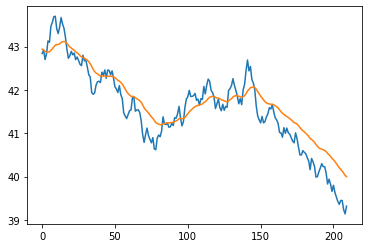

In [56]:
y_s = [i for i in range(len(y_pred))]
plt.plot(y_s, prcAll[0].iloc[250:])
plt.plot(y_s, y_pred)